# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달하므로,   
request와 딕셔너리를 활용하면 됨

# JSON 활용 연습
http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31

In [ ]:
import requests, json, pandas as pd

In [ ]:
URL ='http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [ ]:
resp

In [ ]:
# 텍스트
data1 = resp.text
print(type(data1), len(data1))
print(data1)

In [ ]:
# json
data2 = resp.json()
print(type(data2), len(data2))
print(data2)

In [ ]:
data2

In [ ]:
id_, date, symbol, open_, close= [], [], [], [], []

for item in data2 :
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [ ]:
df = pd.DataFrame({
    'id' : id_,
    'date' : date,
    'symbol' :symbol,
    'open' : open_,
    'close' : close,
})

In [ ]:
df.head()

# 공공데이터포털 API 아파트매매 실거래자료 수집
https://wikidocs.net/85279
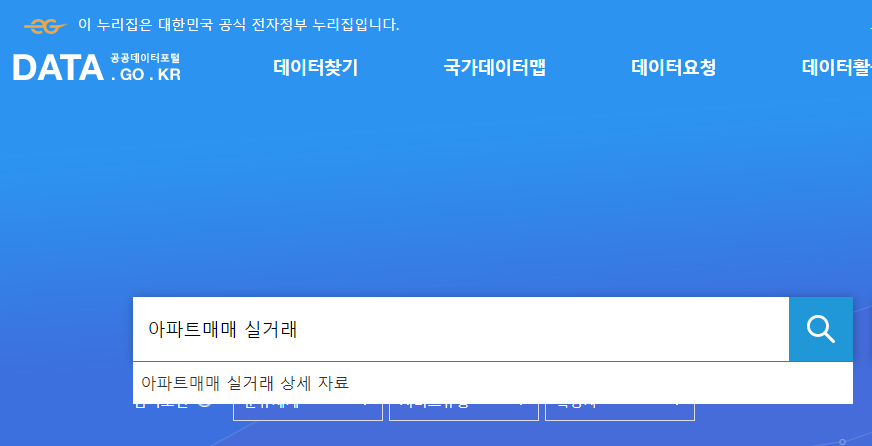

In [ ]:
BeautifulSoup?

In [ ]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'

url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text
textsrc

In [ ]:
BeautifulSoup?

In [ ]:
soup = BeautifulSoup(textsrc, 'xml')
soup

In [ ]:
items = soup.select('response > body > items > item') 
items

In [ ]:
a = items[0].select('거래금액')
print(type(a))
print(a)

In [ ]:
b = items[0].select_one('거래금액')
print(type(b))
print(b)

In [ ]:
c = items[0].select_one('거래금액').text
print(type(c))
print(c)

In [ ]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')

items = soup.select('response > body > items > item') 

for item in items:
    print(item.select_one('거래금액').text.strip(),
          item.select_one('건축년도').text,
          item.select_one('년').text,
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text,
          item.select_one('월').text,
          item.select_one('일').text,
          item.select_one('전용면적').text,
          item.select_one('지번').text,
          item.select_one('지역코드').text,
          item.select_one('층').text)

In [ ]:
# 반복되는 코드 정리
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

for item in items:
    for tag in item_list:
        print(item.select_one(tag).text.strip(), end=' ')
    print()

## 결측값 채우기
요청 정보에 대한 응답 데이터가 없을 수도 있다.   
이 경우 별도 처리가 없으면 오류가 발생하므로 대응이 필요하다.

In [ ]:
import requests
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
for item in items:
    for tag in item_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

## csv 파일 저장

In [ ]:
import requests, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []

for item in items:
    data_list.append([ default_text(item.select_one(tag), '') for tag in item_list]) # value를 행기준으로 맞춤, 110 X 11
print(data_list)

df = pd.DataFrame(data_list, columns=item_list)
print('='*50)
print(df)
df.to_csv('./sample/아파트매매실거래자료수집.csv', index=False, encoding='cp949') 

In [ ]:
# 기존 코드
l = []
for item in items:
    print(default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), ''))
    l.append([default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), '')])
print(l)

## 여러달 수집

In [ ]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

In [ ]:
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)
start_datetime 

In [ ]:
date = start_datetime.strftime('%Y%m') #
date

In [ ]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
start_datetime = datetime.datetime(2023, 1, 1)

data_list = []
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

while True:
    date = start_datetime.strftime('%Y%m') #202301
    
    if date >= '202309':
        break
        
    region_code = '11110'
    
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item') 
    
    print('='*10, date, '='*10)
    
    for item in items:
        data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
    
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)  # += 1달 

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

## 여러 지역 코드 수집
지역 코드 : 각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리   
https://www.data.go.kr/data/15123287/fileData.do

```python
# import csv
# with open('region_code.csv', 'r', encoding='euc-kr') as f :
#     for line in csv.reader(f):
#         print(line)
data = pd.read_csv("region_code.csv", sep=",")
data
```

In [ ]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []        
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    for lawd_cd in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={lawd_cd}&DEAL_YMD={date}&serviceKey={apikey}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949')
print('저장 완료')

# 네이버 지식인 API 연동
https://developers.naver.com/docs/serviceapi/search/kin/kin.md#%EC%A7%80%EC%8B%9DiN

In [6]:
import requests, time, os, json
from html import unescape

In [7]:
# input
client_id = 'ajLgZ7LDeJqR3kOxUxRR'
client_secret = 'oP5j073ZAW'

queries = ['전주 여행', '경주 여행']
goal_page = 5

In [8]:
# setting
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) " + \
             "AppleWebKit/537.36 (KHTML, like Gecko) " + \
             "Chrome/51.0.2704.103 Safari/537.36"

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [9]:
file_name = './sample/naver_kin.txt'

with open(file_name, 'w', encoding='utf-8') as f :
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

In [12]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
response

<Response [401]>

In [13]:
print(response.text)

{"errorMessage":"Scopes are Empty : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}


In [14]:
json.loads(response.text)

{'errorMessage': 'Scopes are Empty : Authentication failed. (인증에 실패했습니다.)',
 'errorCode': '024'}

In [15]:
json.loads(response.text)['items']

KeyError: 'items'

In [16]:
elements = json.loads(response.text)['items']
elements[0]

KeyError: 'items'

In [ ]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = unescape(elm['description'].replace("<b>", "").replace("</b>", ""))
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [ ]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

# ChatGPT API 연동

In [ ]:
# pip install --upgrade openai
!pip install openai

In [ ]:
import os
from openai import OpenAI

In [ ]:
client = OpenAI(
  api_key= "api key 입력"
)

In [ ]:
client.models.list()

In [ ]:
for m in client.models.list():
    print(m)

In [ ]:
input_text = "인공지능이 뭐야"

In [ ]:
client.chat.completions.create?

In [ ]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [ ]:
type(response)

In [ ]:
response

In [ ]:
response.choices

In [ ]:
response.choices[0].message.content

In [ ]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [ ]:
chatgpt('what is ai')